In [1]:
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import matplotlib.pyplot as plt

import scipy.io as sio

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

#  Part 1: Loading and Visualizing Data

In [4]:
data = sio.loadmat(file_name='ex5data1.mat')

In [37]:
X = data['X']
Xtest = data['Xtest']
Xval = data['Xval']
y = data['y']
ytest = data['ytest']
yval = data['yval']

m = np.shape(X)[0]

In [38]:
X

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [39]:
m

12

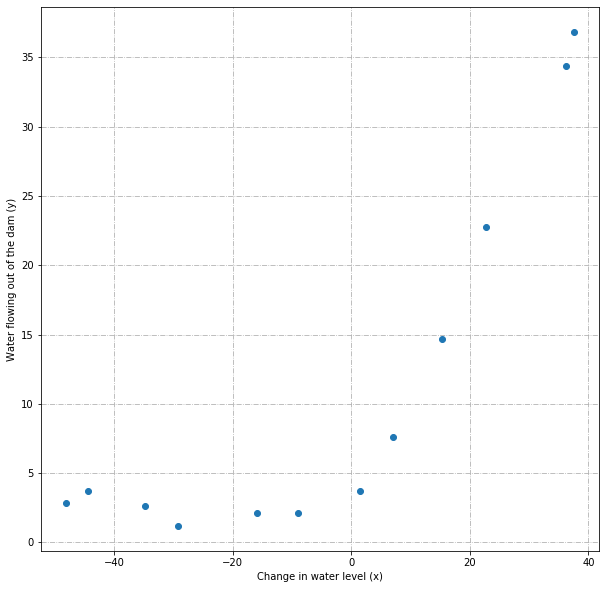

In [40]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(X, y, 'o' )
ax.set_xlabel("Change in water level (x)")
ax.set_ylabel("Water flowing out of the dam (y)")

plt.show()

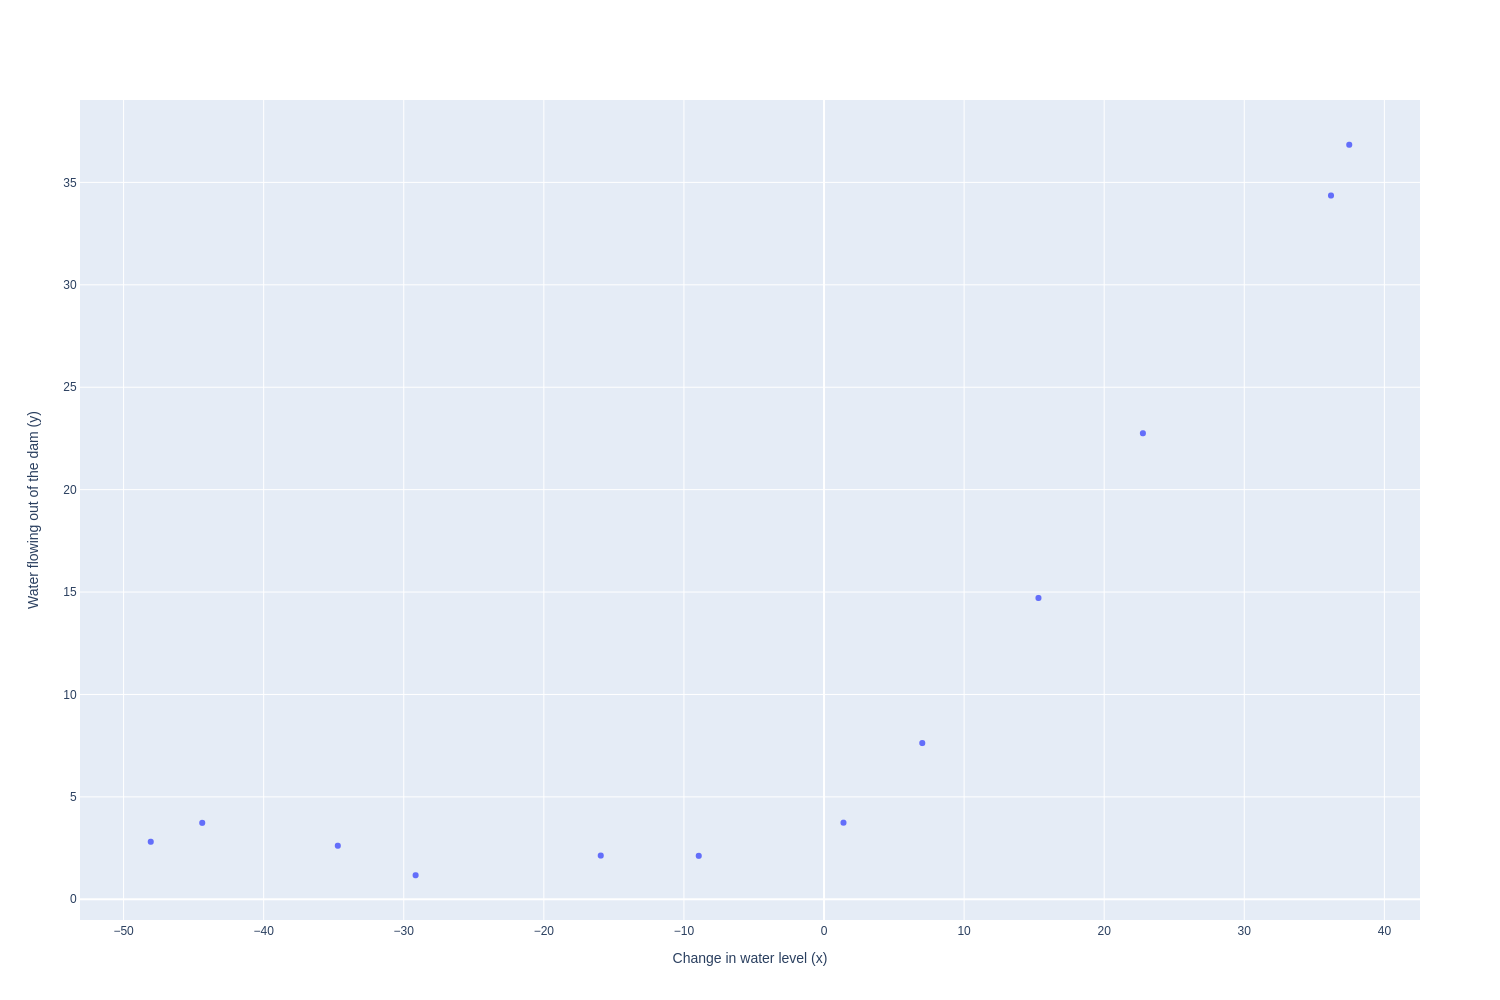

In [42]:
fig1 = go.Figure()

layout = go.Layout(
                    autosize=True,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Change in water level (x)"),
                    yaxis = dict( title_text = "Water flowing out of the dam (y)")
    )

trace1 = go.Scatter( x = X.flatten(), y = y.flatten(), mode='markers')

fig1.layout = layout
fig1.add_trace( trace1 )

# Part 2: Regularized Linear Regression Cost

In [28]:
theta = np.array([1, 1])

In [128]:
def linearRegCostFunction(X, y, theta, lambda_val):
    
    m = np.shape(X)[0]

    J       = 1.0/(2*m) * np.sum( (np.reshape(np.dot(X, theta), np.shape(y)) -y)**2 )  + lambda_val / ( 2 * m) * ( np.sum( theta[1:]**2 )  )      
    
    grad = 1.0/m     * np.sum( ( np.reshape(np.dot(X, theta), np.shape(y)) -y) * X ,axis =0)
    grad[1:] = grad[1:] + lambda_val / ( m) *  theta[1:]     
    
    return J , grad

In [131]:
J = linearRegCostFunction( (np.hstack((np.ones([m,1]), X))) , y, theta, 1)[0]

In [140]:
print(f'Cost at theta = [1 ; 1]: {J:.6f} ')
print('(this value should be about 303.993192)' ) 


Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


#  Part 3: Regularized Linear Regression Gradient

In [141]:
theta = np.array([1, 1])

In [142]:
J, grad = linearRegCostFunction( (np.hstack((np.ones([m,1]), X))) , y, theta, 1)

In [143]:
print(f'Gradient at theta = [1 ; 1]: [{ grad[0]:.6f}; { grad[1]:.6f}] ')
print('(this value should be about [-15.303016; 598.250744])')
      

Gradient at theta = [1 ; 1]: [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


# Part 4: Train Linear Regression

In [144]:
lambda_val = 0

In [189]:
from scipy.optimize import minimize

def linearRegCostFunction_J(theta, Xy):
    
    return linearRegCostFunction( Xy[0], Xy[1], theta, Xy[2])[0]

def linearRegCostFunction_grad(theta, Xy):

    return linearRegCostFunction(Xy[0], Xy[1], theta, Xy[2])[1]

def trainLinearReg( X, y, lambda_val):
        
        
        initial_theta = np.zeros(np.shape(X)[1])
        
        constrains_args = [X, y, lambda_val]
        
        options = { 'maxiter':200 }
        
        res = minimize(linearRegCostFunction_J, x0 = initial_theta, args=constrains_args, options =options, method="Newton-CG", jac = linearRegCostFunction_grad )
    
        theta = res.x
        
        return theta
    
    

In [190]:
theta = trainLinearReg( np.hstack((np.ones([m,1]), X)), y, lambda_val)

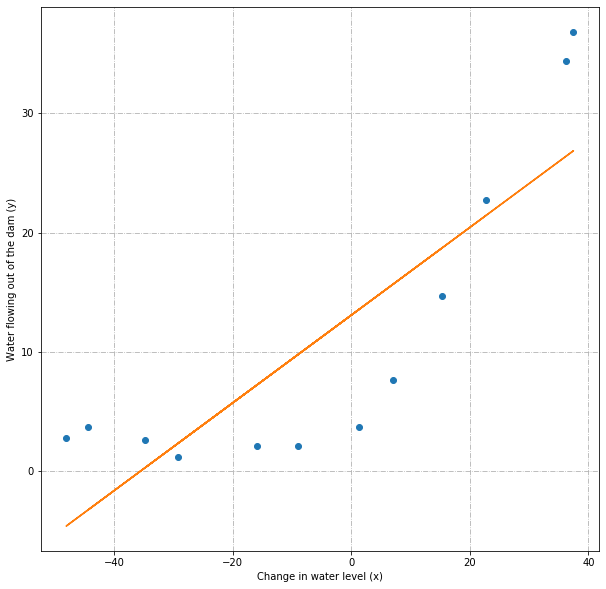

In [191]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(X, y, 'o' )
ax.plot(X, np.dot(np.hstack((np.ones([m,1]), X)), theta) , '-' )

ax.set_xlabel("Change in water level (x)")
ax.set_ylabel("Water flowing out of the dam (y)")

plt.show()

# Part 5: Learning Curve for Linear Regression 

In [230]:
def learningCurve(X, y, Xval, yval, lambda_val):
    
    m = np.shape(X)[0]
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(0,m):
        theta = trainLinearReg(X[:i+1,:], y[:i+1,:], lambda_val)
        error_train[i] = linearRegCostFunction(X[:i+1,:], y[:i+1,:], theta, 0)[0];
        error_val[i]   = linearRegCostFunction(Xval, yval, theta, 0)[0];
    
    return error_train, error_val

In [231]:
lambda_val = 0 

In [232]:
error_train, error_val = learningCurve( np.hstack((np.ones([m,1]), X)), y,  np.hstack((np.ones([np.shape(Xval)[0],1]), Xval)), yval, lambda_val)

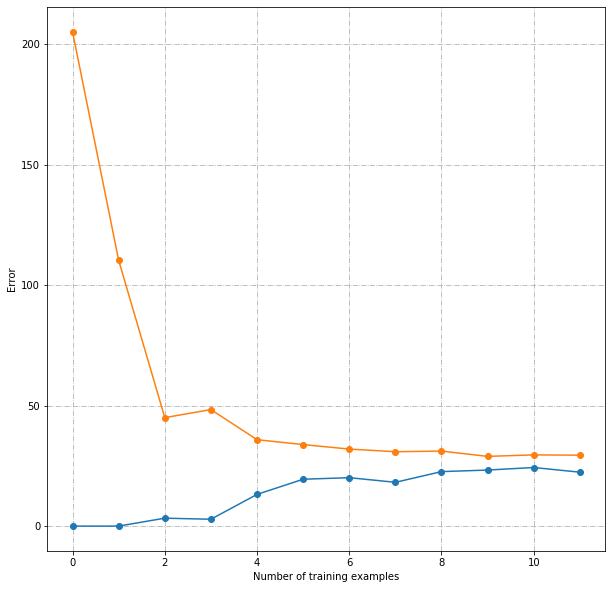

In [233]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(np.arange(m), error_train, 'o-' )
ax.plot(np.arange(m), error_val, 'o-' )

ax.set_xlabel("Number of training examples")
ax.set_ylabel("Error")

plt.show()

In [244]:
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print(f'  \t { i+1 }\t\t{ error_train[i]:.6f}\t{ error_val[i]:.6f}')


# Training Examples	Train Error	Cross Validation Error
  	 1		0.000000	205.121096
  	 2		0.000000	110.300356
  	 3		3.286595	45.010231
  	 4		2.842678	48.368911
  	 5		13.154049	35.865165
  	 6		19.443963	33.829962
  	 7		20.098522	31.970986
  	 8		18.172859	30.862446
  	 9		22.609405	31.135998
  	 10		23.261462	28.936207
  	 11		24.317250	29.551432
  	 12		22.373906	29.433818


# Part 6: Feature Mapping for Polynomial Regression

In [ ]:
p = 8

In [79]:
np.hstack((np.ones([m,1]), X))

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [80]:
linearRegCostFunction( (np.hstack((np.ones([m,1]), X))) , y, theta, 1)

[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
[1 1]
[-14.93675813 -28.15297922  37.18954863  38.49218733 -47.05882945
  -7.94145794  16.30779289 -33.70626581   2.38915437 -43.38375985
   8.01350208  23.76274892]


TypeError: 'tuple' object cannot be interpreted as an integer